# BATCH GRADIENT DESCENT WITH EARLY STOPPING FOR SOFTMAX REGRESSION

In this notebook we will implement a batch gradient descent with early stopping for softmax regression (ex 12 ch. 4 of "**Hands-On Machine Learning with Scikit-Learn, Keras & Tensorflow**" by Aurélien Géron3. 

We have to implement it by scratch without using scikit-learn. 

We will try to formulate the problem in the more optimized way to obtain speed results and beatiful formulation.

## Settings

We start import all we need.

In [1]:
import numpy as np 
from sklearn import datasets
import matplotlib.pyplot as plt

In this part we introduce the **softmax_score** for an instance $\textbf{x}$ for class $k$ defined as:
$$
s_k(\textbf{x}) = \textbf{x}^T \theta^{(k)}
$$
of dimension $(1,)$
so, for a dataframe we obtain:

$$
s_k(\textbf{X}) = \textbf{X} \theta^{(k)}
$$
of dimensions $(\mbox{number of row of X}, )$.

Finally for all classes: 

$$
\textbf{s}(\textbf{X}) = (s_1(\textbf{X}), s_2(\textbf{X}), ..., s_k(\textbf{X})) =  \textbf{X} \Theta = \textbf{X} \big[\theta^1, \theta^2, ... , \theta^k\big]
$$
of  $dim\big(\textbf{s}(\textbf{X})\big) = (\mbox{number of row of X}, \mbox{numer of classes K})$

and $\textit{dim}(\Theta)= ({\mbox{number of columns}, \mbox{number of classes K}})$.

In [ ]:
def softmax_score(X, Theta):
    score = np.matmul(X, Theta)
    return score

The softmax function for the instance $\textbf{x}$ is:

$$
\hat{p}_k(\textbf{x}) = \sigma(\textbf{s}(\textbf{x}))_k = \dfrac{exp(s_k(\textbf{x}))}{\sum_{j = 1}^K exp(s_j(\textbf{x}))}
$$
of dimension $(1,)$.

So, for a dataframe we obtain:
\begin{align} 
\hat{P}(\textbf{X}) = \begin{bmatrix}
     \dfrac{exp(s_1(\textbf{x}_1))}{\sum_{j = 1}^K exp(s_j(\textbf{x}_1))}, ..., \dfrac{exp(s_k(\textbf{x}_1))}{\sum_{j = 1}^K exp(s_j(\textbf{x}_1))} \\
    \vdots \\
     \dfrac{exp(s_1(\textbf{x}_n))}{\sum_{j = 1}^K exp(s_j(\textbf{x}_n))}, ..., \dfrac{exp(s_k(\textbf{x}_n))}{\sum_{j = 1}^K exp(s_j(\textbf{x}_n))} \\
     \end{bmatrix}
\end{align}

of dimensions $(\mbox{number of row of X},  \mbox{numer of classes K})$.



In [ ]:
def softmax_function(X, Theta, k=None):
    P_not_normalized = np.exp(softmax_score(X, Theta)) 
    P = P_not_normalized / np.sum(P_not_normalized, axis=1, keepdims=True)
    if k is None:
        return P
    else:
        return P[:, k]

We define a learning schedule to reduce the learning rate parameter

In [ ]:
def learning_schedule(t):
    t_0, t_1 = 5, 50 
    return t_0 / (t + t_1)

And finally the batch gradient descent.

If we define the target variables in a one hot encoding way, as in \begin{align} 
\textbf{Y} =  \begin{bmatrix}
    y^{(1)} \\
    y^{(2)} \\
    \vdots \\
     y^{(\textit{number of row})}  \\
     \end{bmatrix} = \begin{bmatrix}
    1, 0, 0, 0 \\
    0, 1, 0, 0\\
    \vdots \\
     0,0,0,1 \\
     \end{bmatrix}
\end{align}
we can define the loss as:
$$
J(\Theta) = -\dfrac{1}{m}\sum_{i=1}^m\sum_{k=1}^K  y_k^{(i)}log\big(\hat{p}_k^{(i)}\big) =  -\dfrac{1}{m} \mbox{trace}(\textbf{Y}log(\hat{P})^T) 
$$
and the gradient of the loss:
$$
\nabla_{\theta^k}J(\Theta)= \frac{1}{m}\sum_{i=1}^m \big(\hat{p}_k^{(i)} - y_k^{(i)}\big)\textbf{x}^{(i)}
$$
and defining the matrix:
$$
\nabla_{\Theta}J(\Theta) = \dfrac{1}{m}\textbf{X}^T \big[\textbf{P}- \textbf{Y}\big]
$$

In [ ]:
def loss_function(Y, P):
    return -1/m * np.trace(np.matmul(Y, np.log(P).transpose()))


In [ ]:
 def batch_gradient_descent(X, y, learning_rate, n_epochs):
    
    Theta = np.random.randn(X.shape[1], len(np.unique(y)))
    m = y.shape[0]
    Y = np.zeros((y.size, y.max()+1))
    Y[np.arange(y.size),y] = 1
    loss = []
    eta = 1e-7
    for epoch in range(n_epochs):
        P =  softmax_function(X, Theta)
        loss.append(loss_function(Y,P))
        gradient = 1/m * np.dot(X.transpose(), P - Y)
        Theta = Theta - learning_rate * gradient
        learning_rate = learning_schedule(learning_rate)
    return theta, loss

## CREATION OF THE MODEL

In [191]:
class model_log_reg():
    def __init__(self, X, y, learning_rate=None, n_epochs=None):
        self.X = X
        self.y = y
        
    def scale(self, X):
        mean_X = np.mean(X, axis = 0)
        std_X = np.std(X, axis = 0)
        X_meanZero = X - mean_X
        X_normalized = X_meanZero / std_X
        return X_normalized

    def softmax_function(self, X, Theta):
        def softmax_score(X, Theta):
            score = np.matmul(X, Theta)
            return score
        P_not_normalized = np.exp(softmax_score(X, Theta)) 
        P = P_not_normalized / np.sum(P_not_normalized, axis=1, keepdims=True)
        return P
    
    def loss_function(self, Y, P):
        m = Y.shape[0]
        return -1/m * np.trace(np.matmul(Y, np.log(P).transpose()))
    
    def batch_gradient_descent(self, X, y, learning_rate, n_epochs):
            X_scaled = self.scale(X)
            X_scaled = np.c_[np.ones([len(X_scaled), 1]), X_scaled]
            
            Theta = np.random.randn(X_scaled.shape[1], len(np.unique(y)))
            m = y.shape[0]
            # one-hot-encoding
            Y = np.zeros((y.size, y.max()+1))
            Y[np.arange(y.size),y] = 1
            loss = []
            
            def learning_schedule(t):
                t_0, t_1 = 5, 50 
                return t_0 / (t + t_1)
            
            for iteration in range(n_epochs):
                P =  self.softmax_function(X_scaled, Theta)
                loss_value = self.loss_function(Y,P)
                loss.append(loss_value)
                if iteration % 500 == 0:
                    print(iteration, loss_value)
                gradient = 1/m * np.matmul(X_scaled.transpose(), P - Y)
                Theta = Theta - learning_rate * gradient
                learning_rate = learning_schedule(learning_rate)
            return Theta, loss
        
    def fit(self, learning_rate=None, n_epochs=None):
        if learning_rate is None:
            self.learning_rate = 0.1
        else:
            self.learning_rate = learning_rate
        if n_epochs is None:
            self.n_epochs = 100
        else:
            self.n_epochs = n_epochs
            
        self.Theta, self.loss = self.batch_gradient_descent(self.X, self.y, self.learning_rate, self.n_epochs)   
    
    def predict(self, X):
        X_scaled = self.scale(X)
        X_scaled = np.c_[np.ones([len(X_scaled), 1]), X_scaled]
        P = self.softmax_function(X_scaled, self.Theta)
        return np.amax(P, axis=1)
    
    def plot_loss(self):
        n_epocs_vector = np.arange(self.n_epochs)
        loss_vector = self.loss
        plt.plot(n_epocs_vector, loss_vector)
        
    def return_Theta(self):
        return self.Theta

0 1.767900645523398
500 0.1809292958702448
1000 0.13639240671497782
1500 0.11786781596804172
2000 0.1074136109096289
2500 0.10059310880543518
3000 0.09574767038675101
3500 0.09210729165544891
4000 0.08926222763445296
4500 0.08697276587810962


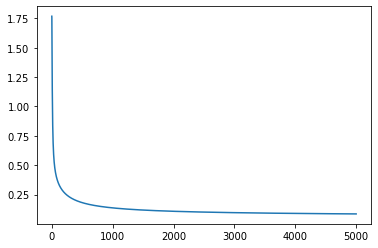

In [195]:
iris = datasets.load_iris()
iris_target = iris["target"]
iris_data = iris["data"][:, (2, 3)]

reg_model = model_log_reg(iris_data, iris_target)
reg_model.fit(learning_rate = 0.01, n_epochs=5000)
reg_model.plot_loss()

In [196]:
reg_model.return_Theta()

array([[-1.65680815,  3.18260765, -3.24328671],
       [-3.597217  ,  0.52862985,  5.17525011],
       [-3.80669277,  0.01062575,  5.96500872]])